In [44]:
import strym
from strym import strymread
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
parentfolder = "../../PandaData/"
csv = parentfolder + '2020_11_05/2020-11-05-10-50-58_2T3Y1RFV8KC014025_CAN_Messages.csv'
csv = parentfolder + '2020_11_05/2020-11-05-10-32-43_2T3Y1RFV8KC014025_CAN_Messages.csv'
csv = parentfolder + '2020_11_05/2020-11-05-10-40-58_2T3Y1RFV8KC014025_CAN_Messages.csv'


In [45]:
r = strymread(csvfile=csv,dbcfile='DBC/newToyotacode_experiment.dbc')

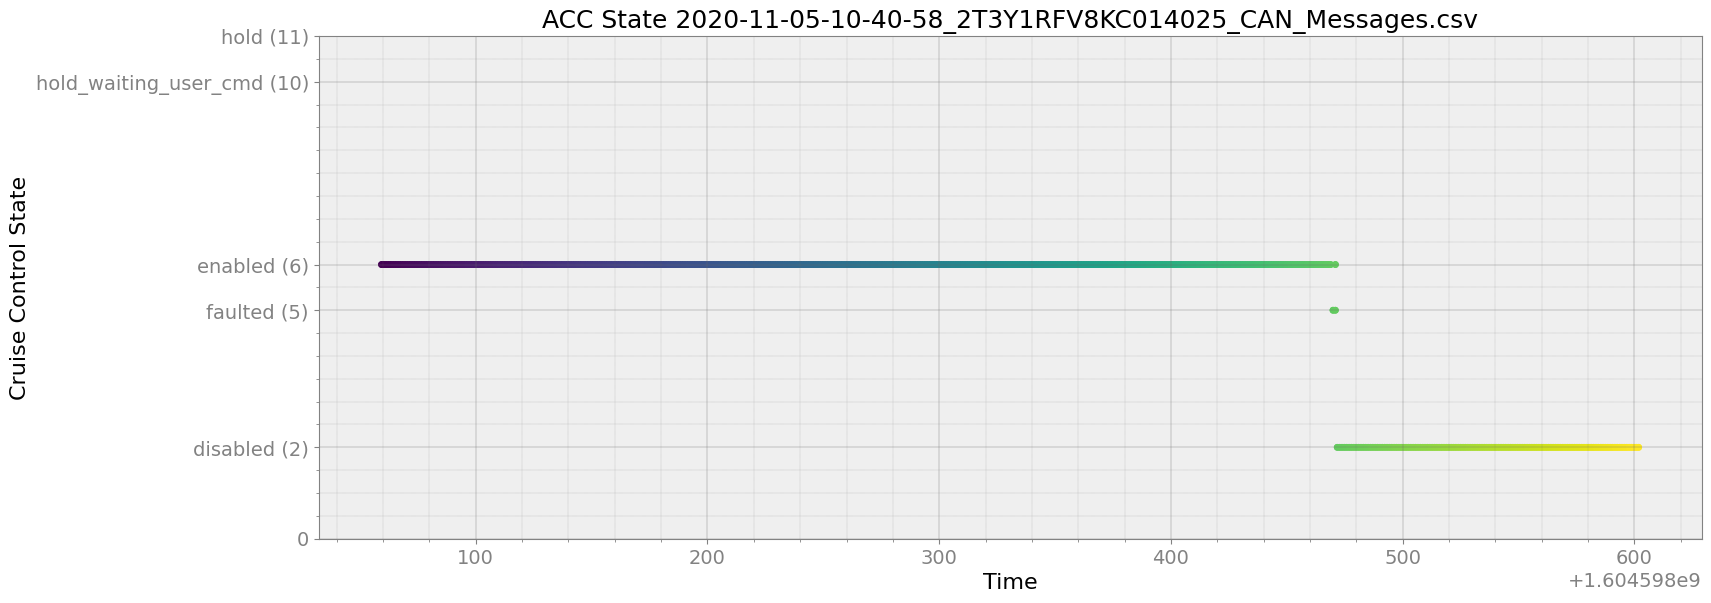

In [46]:
acc1 = r.acc_state(plot = True)

/Users/sprinkle/opt/anaconda3/lib/python3.7/site-packages/strym/strymread.py:2923: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



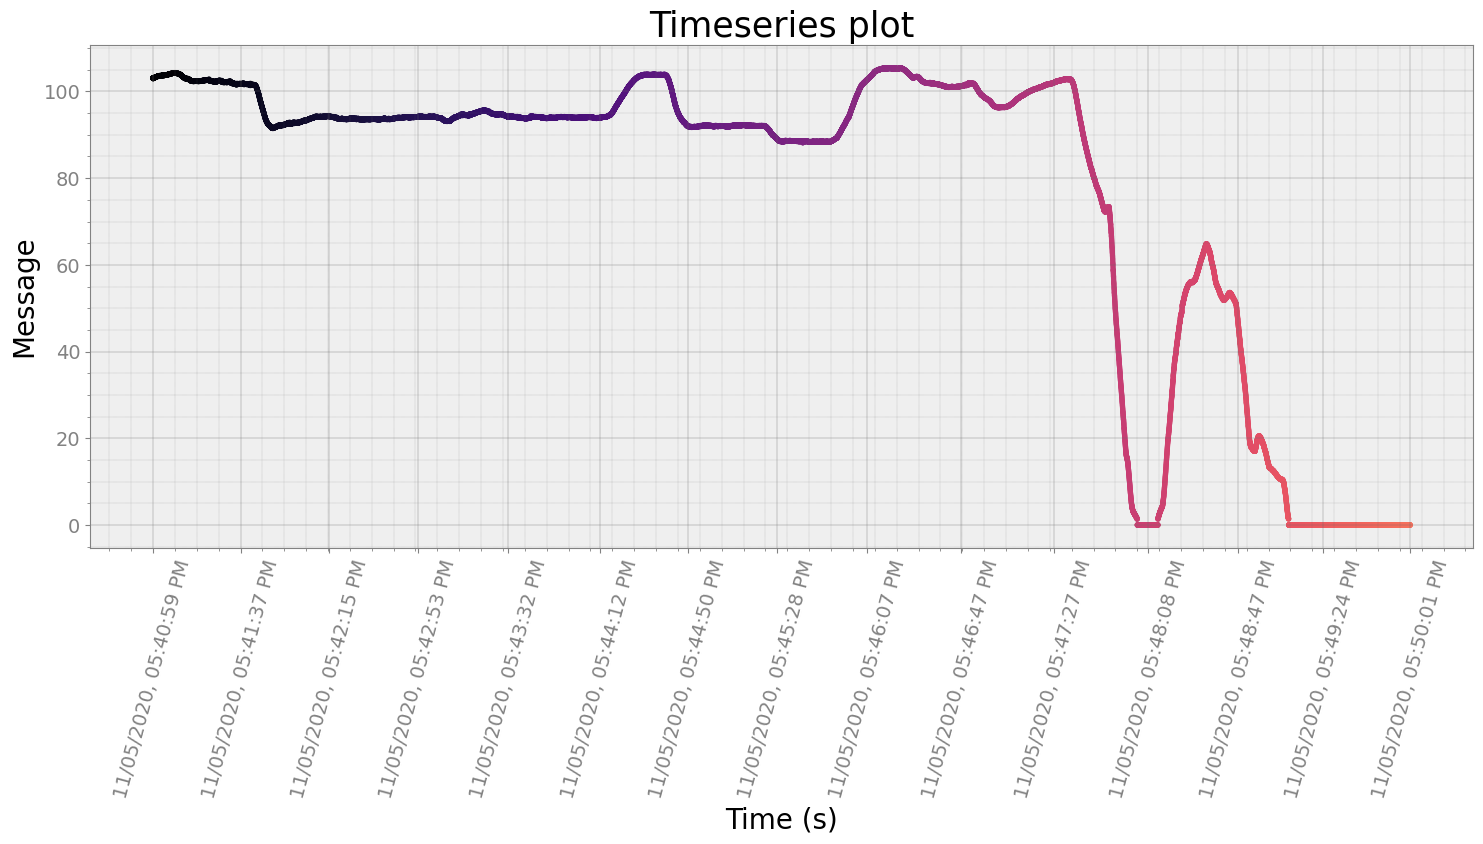

In [47]:
# how do I now plot msg 835 into a plot that can match this w/ setpoint values
speed = r.speed()
strym.config["interactive"] =False
# strym.config["interactive"] = False
r.plt_ts(speed)

In [58]:
# BO_ 467 PCM_CRUISE_2: 8 XXX
#  SG_ MAIN_ON : 15|1@0+ (1,0) [0|1] "" XXX
#  SG_ LOW_SPEED_LOCKOUT : 14|2@0+ (1,0) [0|3] "kph" XXX
#  SG_ SET_SPEED : 23|8@0+ (1,0) [0|255] "kph" XXX
#  SG_ CHECKSUM : 63|8@0+ (1,0) [0|255] "" XXX

# and

# BO_ 869 DSU_CRUISE : 7 DSU
#  SG_ RES_BTN : 3|1@0+ (1,0) [0|0] "" XXX
#  SG_ SET_BTN : 2|1@0+ (1,0) [0|0] "" XXX
#  SG_ CANCEL_BTN : 1|1@0+ (1,0) [0|0] "" XXX
#  SG_ MAIN_ON : 0|1@0+ (1,0) [0|0] "" XXX
#  SG_ SET_SPEED : 15|8@0+ (1,0) [0|0] "km/h" XXX
#  SG_ CRUISE_REQUEST : 31|8@0+ (100,-12800) [0|0] "N" XXX
#  SG_ LEAD_DISTANCE : 39|8@0+ (1,0) [0|0] "m" XXX

# pull set_speed from 467, and SET_SPEED from 869 and plot them both on the same chart
ss_467 = r.get_ts(msg=467,signal="SET_SPEED")
ss_869 = r.get_ts(msg=869,signal="SET_SPEED_2")
ss_869_reset = r.get_ts(msg=869,signal="RES_BTN")
ss_869_set = r.get_ts(msg=869,signal="SET_BTN")
ss_869_cruise_request = r.get_ts(msg=869,signal="CRUISE_REQUEST")

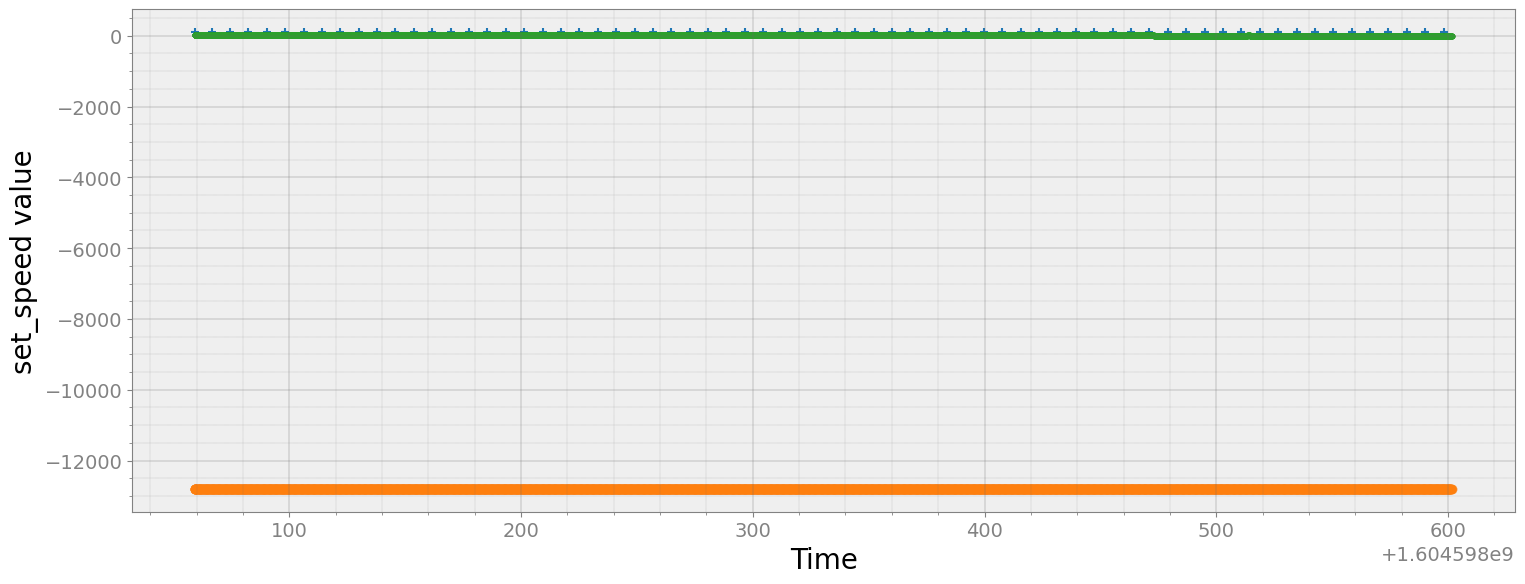

In [59]:
fig, ax = strymread.create_fig(1)
ax[0].scatter(x = ss_467['Time'][::500], y = ss_467['Message'][::500], marker='+')
ax[0].set(xlabel='Time', ylabel='set_speed value')
ax[0].scatter(x = ss_869_cruise_request['Time'], y = ss_869_cruise_request['Message'], marker='o', alpha=0.5)
# ax[0].scatter(x = ss_869_reset['Time'], y = ss_869_reset['Message']/10, marker='o', alpha=0.5)
#ax[0].scatter(x = ss_869_set['Time'], y = ss_869_set['Message'], marker='o', alpha=0.5)
ax[0].scatter(x = speed['Time'], y = speed['Message']/10, marker='.', alpha = 0.5)

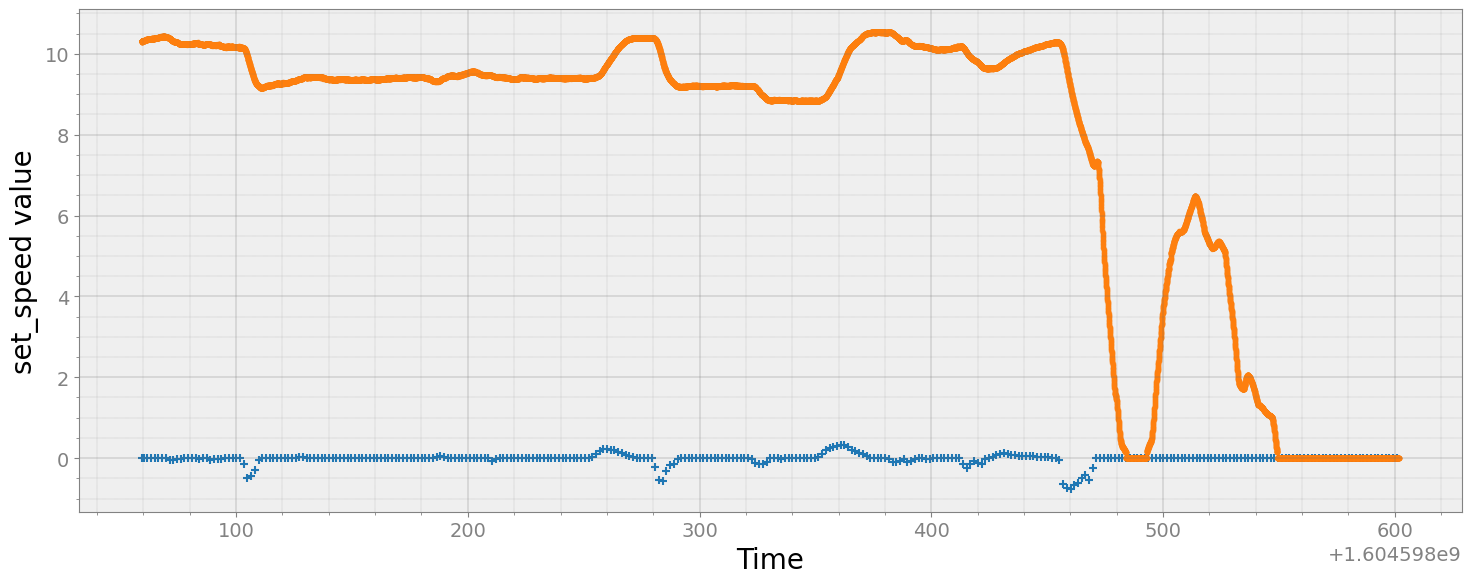

In [61]:
# let's look at accelerator ACC cmd
ss_835 = r.get_ts(msg=835,signal="ACCEL_CMD")
fig, ax = strymread.create_fig(1)
ax[0].scatter(x = ss_835['Time'][::100], y = ss_835['Message'][::100], marker='+')
ax[0].set(xlabel='Time', ylabel='set_speed value')
ax[0].scatter(x = speed['Time'], y = speed['Message']/10, marker='.', alpha = 0.5)

In [ ]:
# matt b. can you compare this to actual accelerations that we see from the strym accel values.